## SCENARIO

You are a junior data analyst working on the marketing analyst team at Bellabeat, a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company. You have been asked to focus on one of Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. The insights you discover will then help guide marketing strategy for the company. You will present your analysis to the Bellabeat executive team along with your high-level recommendations for Bellabeat’s marketing strategy.


**Characters and products:** 

- Characters: 

  + Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer
  
  + Sando Mur: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team
  
  + Bellabeat marketing analytics team: A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat’s marketing strategy. You joined this team six months ago and have been busy learning about Bellabeat’’s mission and business goals — as well as how you, as a junior data analyst, can help Bellabeat achieve them.


- Products: 

  + Bellabeat app: The Bellabeat app provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits. This data can help users better understand their current habits and make healthy decisions. The Bellabeat app connects to their line of smart wellness products.

  + Leaf: Bellabeat’s classic wellness tracker can be worn as a bracelet, necklace, or clip. The Leaf tracker connects to the Bellabeat app to track activity, sleep, and stress.
  
  + Time: This wellness watch combines the timeless look of a classic timepiece with smart technology to track user activity, sleep, and stress. The Time watch connects to the Bellabeat app to provide you with insights into your daily wellness.
  
  + Spring: This is a water bottle that tracks daily water intake using smart technology to ensure that you are appropriately hydrated throughout the day. The Spring bottle connects to the Bellabeat app to track your hydration levels.


**About the company**

Urška Sršen and Sando Mur founded Bellabeat, a high-tech company that manufactures health-focused smart products. Sršen used her background as an artist to develop beautifully designed technology that informs and inspires women around the world. Collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with knowledge about their own health and habits. Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women.


By 2016, Bellabeat had opened offices around the world and launched multiple products. Bellabeat products became available through a growing number of online retailers in addition to their own e-commerce channel on their website. The company has invested in traditional advertising media, such as radio, out-of-home billboards, print, and television, but focuses on digital marketing extensively. Bellabeat invests year-round in Google Search, maintaining active Facebook and Instagram pages, and consistently engages consumers on Twitter. Additionally, Bellabeat runs video ads on Youtube and display ads on the Google Display Network to support campaigns around key marketing dates.


Sršen knows that an analysis of Bellabeat’s available consumer data would reveal more opportunities for growth. She has asked the marketing analytics team to focus on a Bellabeat product and analyze smart device usage data in order to gain insight into how people are already using their smart devices. Then, using this information, she would like high-level recommendations for how these trends can inform Bellabeat marketing strategy.



## 1. ASK 

The business task of this project will consist in identifying trends in the use of smart fitness devices, and see how these could apply to Bellabeat customers in order to inform the company's marketing strategy. 

Questions that will guide our analysis:

- **Which is the kind of profile who use smart devices?** 
This could be any kind of information that enables us to better target the group of women that could potentially be interested in Bellabeat's products. For example, do this kind of devices appeal only to people who are already very much into fitness, or do unfit people also use them? This is interesting as it could help us narrow the scope of Bellabeat's marketing campaign: if the data tells us that only very fit people use smart devices, Bellabeat should center its marketing efforts in places where women who are already into fitness (gyms, fitness websites etc.). 

- **What are the key activity patterns of smart device users?** 
For example: How much activity do they do? What time of the day do they typically exercise?; How many hours do they sleep every day? etc. 


Answering these questions will leave us in a good position to solve our business task.  

## 2. PREPARE 

We will use the "Fitbit Fitness Tracker Data" dataset, which contains personal fitness tracker data from around 30 fitbit users, and includes various files which give us information on physical activity, daily steps, and heart rate that can be used to explore users’ habits. 

The first step that we'll take is to open each file in Excel so we can have a first impression of the data. 

**General information of dataset**:

- Generated by respondents to a distributed survey via Amazon Mechanical Turk between 03/12/2016 and 05/12/ 2016.

- 18 files.

- Public dataset. Privacy is respected: key personal informations (Names, adresses etc.) don't appear. 

- Some files are in long format, others in wide format. 


**Limitations of the dataset:**

- Third party provider (Amazon). 

- Old data (collected 6 years ago); it may have lost some of its relevance.

- Sample size is small: it may not accurately represent the whole population that use smart fitness devices. 

- The number of participants is not the same for every file: weight data for instance only has 8 particpants.

- The data doesn't contain information on gender, which limits the scope of our conclusions as the target population of Bellabeat are women exclusively. 

- It would be good to have some demographic information: factors as age can be very important when analyzing health related data.  



**How will this data help solve our business task?**

This dataset is relevant to our purposes, as it contains health-related information which the Bellabeat smart devices also measure. It can therefore give us insights into the different type of people that use smart devices, and the way they use these, which can be useful to inform Bellabeats marketing strategy and can be useful to suggest ways to improve the current Bellabeats smart devices. 

However, given the aforementioned limitations of the dataset, the analysis and the corresponding conclusions should be seen as speculative. 



## 3. PROCESS

Now that we have taken a look at the data, it is time to sort it, clean it, and format it appropriately in order to analyze it. We will use R, as it is complicated to manipulate large files with Excel (and the files will indeed become quite big once we merge them!). 

Some files contain columns which are exactly the same as columns from other files. For instance, all columns from daily_calories, daily_steps, daily_intensities files are already contained within the daily_activities file, so we don't need to import them. Furthermore, there are some files which can easily be merged.  

First of all, let's upload the libraries we will need. 


In [1]:
library(readr)
library(tidyverse)
library(data.table)
library(lubridate)
library(reshape2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ dplyr   1.0.10
✔ tibble  3.1.8      ✔ stringr 1.4.1 
✔ tidyr   1.2.1      ✔ forcats 0.5.2 
✔ purrr   0.3.5      
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose



Attaching package: ‘lubridate’


The following objects are masked from ‘package:data.table’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘reshape2’


The following objects are masked from ‘package:data.table’:

    dcast, melt


The following object is masked from ‘package:tidyr’


Open the files we will use (we will not need all the files of the dataset): 


In [2]:
#Information on daily_activities (includes other files)
daily_activities = read.csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')

#Activity information hour by hour
hourly_calories = read.csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv')

hourly_intensities = read.csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv')

hourly_steps = read.csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv')

#Sleep data
sleep_day = read.csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv') #by day
sleep_minutes = read.csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv') #by hour

#Weight data 
weight_log = read.csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv')

We can merge the hour data into a single dataframe. 

In [3]:
hourly_activities = merge(hourly_calories, hourly_intensities)
hourly_activities = merge(hourly_activities, hourly_steps)
rm(hourly_calories, hourly_intensities, hourly_steps) #remove the merged dataframes to free up space



We will mainly be using 5 dataframes:

1. **daily_activities** - This is the main dataframe we will be working with. It contains various columns with different type of information on daily physical activity (such as number of steps, level of intensity of activity, calories burnt etc.)

2. **hourly_activities** - Contains data specifying level of intensity of activity per hour, as well as calories burnt. 

3. **sleep_day** - Mainly includes information on quantity of sleep per day, as well as time spent in bed. 

4. **sleep_minutes** - Contains sleep intensity levels per hour. 

5. **weight_log** - Includes weight of participants and a column specifying if the weight was put in manually or automatically. 


Let's see how many participants we have for each dataframe: 

In [4]:
print(paste('Number of participants daily activities:', length(unique(daily_activities$Id))))
print(paste('Number of participants hourly activities data:', length(unique(hourly_activities$Id))))
print(paste('Number of participants sleep data:', length(unique(sleep_day$Id))))
print(paste('Number of participants weight data:', length(unique(weight_log$Id))))

[1] "Number of participants daily activities: 33"
[1] "Number of participants hourly activities data: 33"
[1] "Number of participants sleep data: 24"
[1] "Number of participants weight data: 8"


Hourly and daily data on physical activity is the most reliable as it has information for all 33 participants. Weight data on the other hand includes too few participants to be able to identify general trends (we will nevertheless proceed to analyze it). 

**Clean the data**

Check if there are any duplicates (and if they exist get rid of them): 

In [5]:
nrow(daily_activities) == nrow(unique(daily_activities)) #no duplicates for daily_activities
nrow(hourly_activities) == nrow(unique(hourly_activities)) #no duplicates for hourly

nrow(sleep_day) == nrow(unique(sleep_day))#sleep_day has duplicates
sleep_day = unique(sleep_day) #remove the 3 duplicates

nrow(sleep_minutes) == nrow(unique(sleep_minutes))
sleep_minutes = unique(sleep_minutes) #remove 543 duplicates 

nrow(weight_log) == unique(nrow(weight_log)) #no duplicates for weight_log

[1] TRUE

[1] TRUE

[1] FALSE

[1] FALSE

[1] TRUE

**Format the data:**
We will format the data as we go along.


## 4. ANALYZE & 5. SHARE


##### PHYSICAL ACTIVITY
Let's start by analyzing the daily activity of the users. 

How many days of data do we have for each user?  

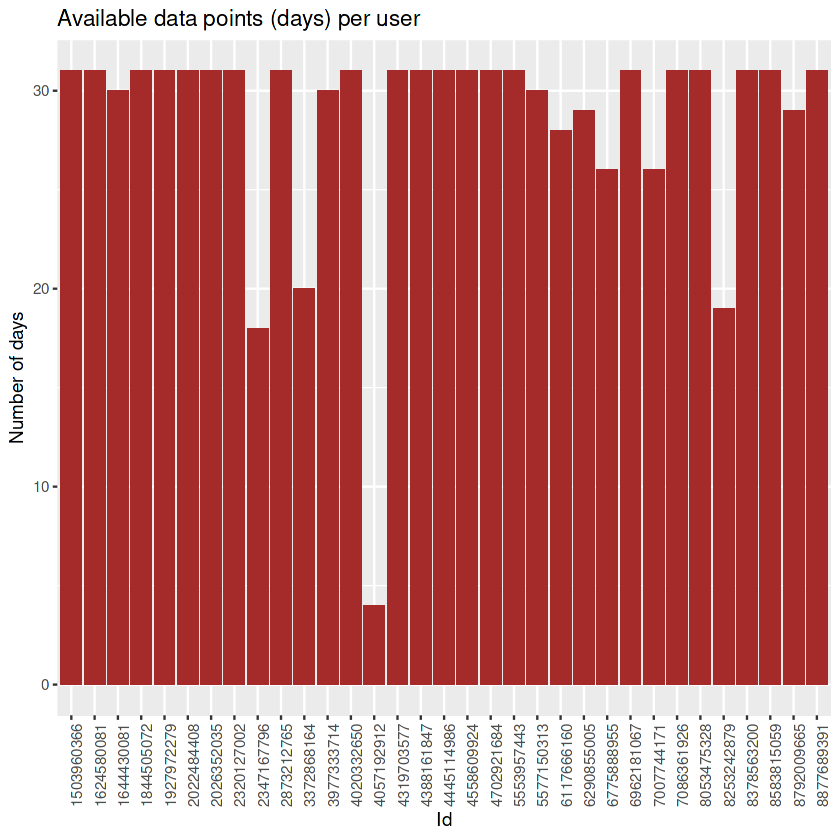

In [6]:
daily_activities$Id = as.factor(daily_activities$Id)

ggplot(daily_activities)+
  geom_bar(aes(Id), fill = 'brown')+
  theme(axis.text.x = element_text(angle = 90))+
  labs (title = 'Available data points (days) per user')+
  ylab('Number of days')

For most users, we have data for 1 month. There are 4 users for who we have less than 20 days of data. 

Now let's see how much (average) hours of data we have for each user. This can be interesting as it indicates us the daily amount of time in which users are wearing the fitbit (smart device) bracelet. 

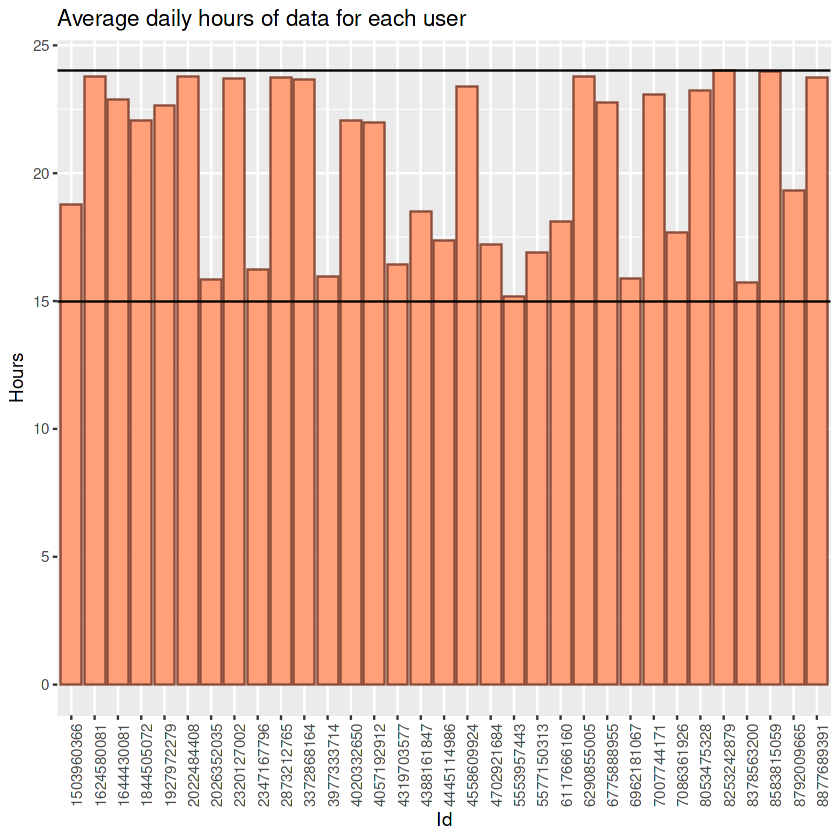

In [7]:
daily_activities = daily_activities%>%
  mutate(total_minutes = VeryActiveMinutes + FairlyActiveMinutes + LightlyActiveMinutes +
                         SedentaryMinutes)%>%  #sum all columns of minutes to know for how much time smart device was on (in minutes)   
  mutate(total_hours = round((VeryActiveMinutes + FairlyActiveMinutes + LightlyActiveMinutes +
                         SedentaryMinutes)/60)) #same as above but in hours

ggplot(daily_activities)+
  geom_bar(aes(x = Id, y = total_hours),
           stat = 'summary', fun = 'mean', fill = 'lightsalmon1', color = 'salmon4')+
  theme(axis.text.x = element_text(angle = 90))+
  geom_hline(yintercept=15)+
  geom_hline(yintercept=24)+
  labs (title = 'Average daily hours of data for each user')+
  ylab('Hours')

The use of the fitbit smart device ranges between 15 and 24 hours. For those users for which we don't have all 24 hours, most of the missing data very likely corresponds to sedimentary time (probably sleep-time), as correlation shows: 

In [8]:
cor(daily_activities$total_hours, daily_activities$SedentaryMinutes) 

[1] 0.9145394

**INFO 1:** 
The time that users wear their (smart device) bracelet ranges between 15 and 24 hours. Only 36% of users wear the bracelet all day long (between 23 and 24 hours). 





We could imagine that those users who wear the device the most, correspond to the users which are more engaged with staying fit, and therefore do the most physical activity. This is however not the case: there is no correlation between the number of steps users take and the amount of time they wear the smart device bracelet.

`geom_smooth()` using formula 'y ~ x'



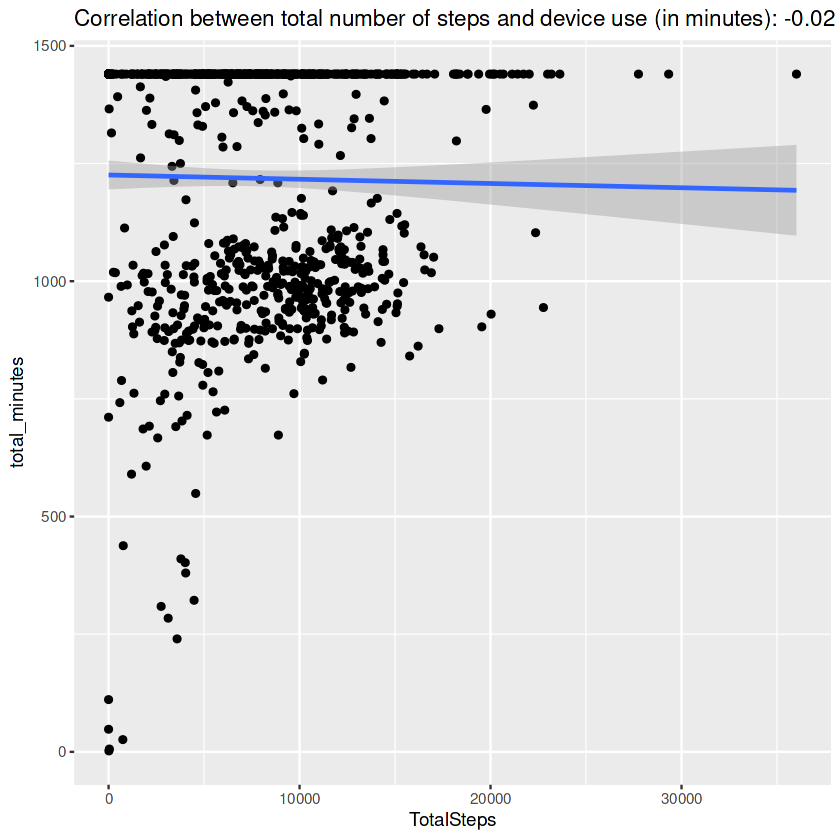

In [9]:
correlation = round(cor(daily_activities$TotalSteps, daily_activities$total_minutes), digits=2)

ggplot(daily_activities,aes(x = TotalSteps, y = total_minutes))+
  geom_point()+
  geom_smooth(method=lm)+
  labs (title = paste("Correlation between total number of steps and device use (in minutes):", correlation))


We will now take a look at how many steps per day each user takes, to get an idea of the different fitness profiles of our dataset. 

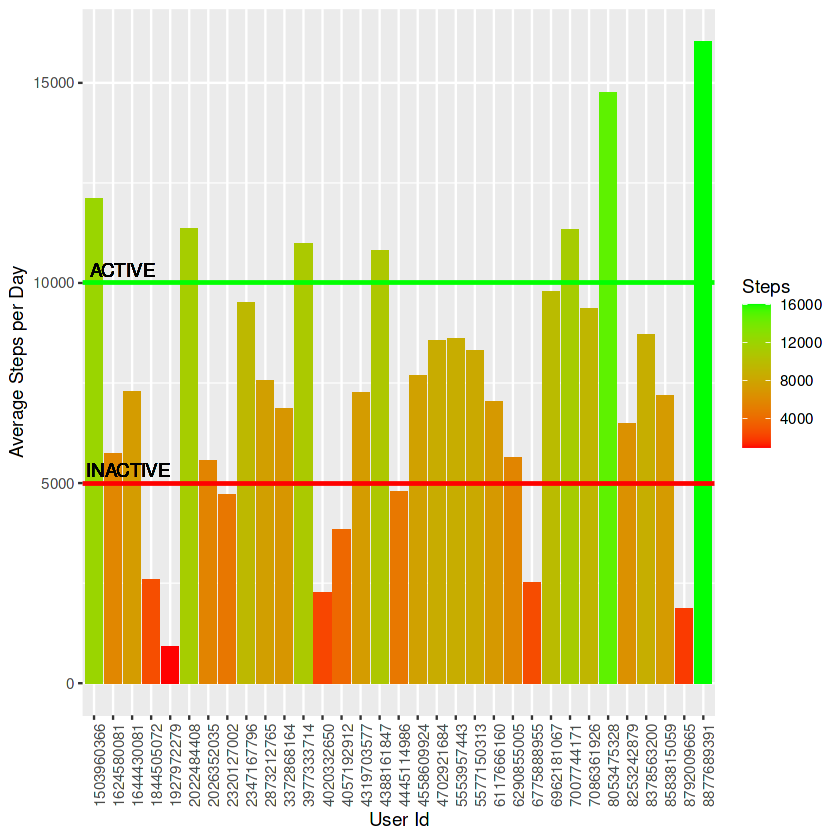

In [10]:
mean_steps = daily_activities%>% #calculate mean number of steps per day. 
  group_by(Id)%>%
  summarise(Steps = mean(TotalSteps)) 

ggplot(mean_steps,aes(x = Id, y = Steps, fill = Steps))+
  geom_bar(stat='identity')+
  scale_fill_gradient(low = "red", high = "green")+
  theme(axis.text.x = element_text(angle = 90))+
  geom_hline(yintercept = 10000, colour = 'green', size = 1)+
  geom_text(aes(2.5, 10000, label = 'ACTIVE',vjust = -0.4))+
  geom_hline(yintercept = 5000, colour = 'red', size = 1)+
  geom_text(aes(2.8, 5000, label = 'INACTIVE',vjust = -0.4))+
  ylab('Average Steps per Day')+
  xlab('User Id')

Health experts and fitness apps typically recommend to take around 10, 000 steps per day. 5, 000 steps per day is considered the minimum under which someone is doing too little physical activity. 


**INFO 2: There is a great variability in the fitness profile of users**. As the graph shows there is a group of users which is very active (around 10, 000 steps per day or above); a group who is lightly active (between 5, 000 and 10, 000 steps), and another one which is inactive (under 5, 000 steps per day). 
In general, most of the users take less than the recommended 10, 000 daily steps. 



One of the reasons why taking the minimum recommended number of steps is important is for burning calories, which is a key component for staying fit. 

`geom_smooth()` using formula 'y ~ x'



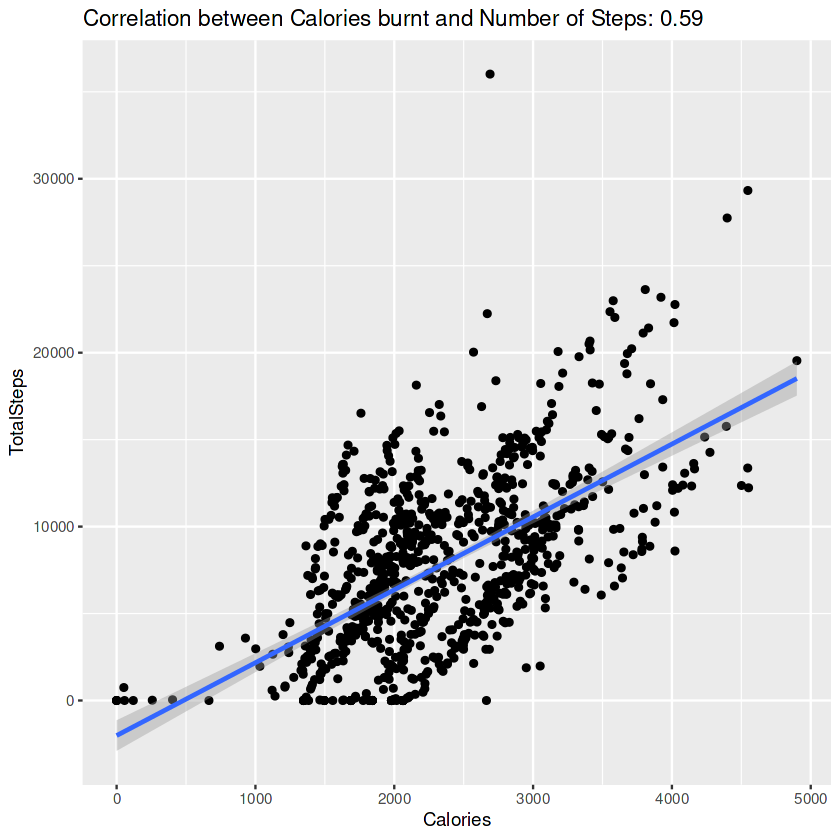

In [11]:
ggplot(daily_activities, aes(Calories, TotalSteps))+
  geom_point()+
  geom_smooth(method=lm)+
  labs(title = paste('Correlation between Calories burnt and Number of Steps:', round(cor(daily_activities$TotalSteps,daily_activities$Calories), digits = 2)))

`geom_smooth()` using formula 'y ~ x'



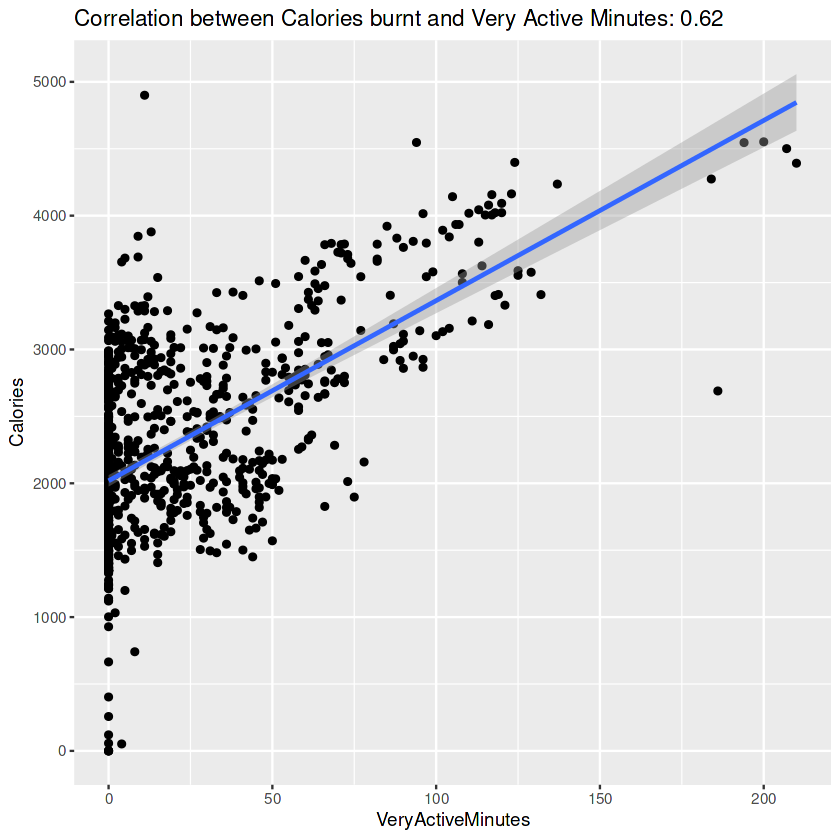

In [12]:
ggplot(daily_activities, aes(VeryActiveMinutes, Calories))+
  geom_point()+
  geom_smooth(method=lm)+
  labs(title = paste('Correlation between Calories burnt and Very Active Minutes:', round(cor(daily_activities$VeryActiveMinutes,daily_activities$Calories), digits = 2)))

**INFO 3: ** As obvious as it is, it is good to keep in mind that the more steps one takes the more calories one burns - as the above correlations show.



Another aspect which is interesting to understand is how much time of the day are users active (vs time of the day when they are sedentary).  

No id variables; using all as measure variables



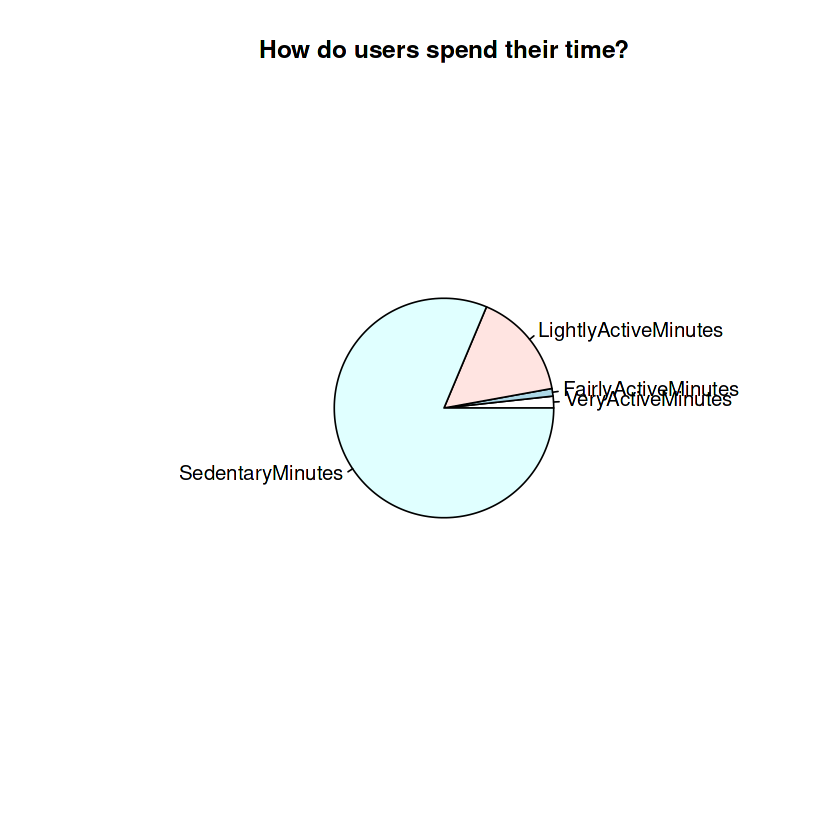

In [13]:
minutes = daily_activities[,11:14] #transform data to long to be able to plot it 
minutes = melt(minutes)

mins = minutes%>%
  group_by(variable)%>%
  summarise(mean = mean(value))%>%
  mutate(freq = mean/sum(mean)*100)

pie(mins$freq, labels = mins$variable, main = 'How do users spend their time?')


**INFO 4:**  For the most part of the day, users are not moving. When they do move they tend to be lightly active. This might give us a hint at the type of jobs users have: probably computer-based or office jobs, which require being sedentary (this, added to sleep time, might explain why users are so sedentary). 




Let's try to find out if the quantity of activity users do is different following the **day of the week** it is.  

[1] "C"

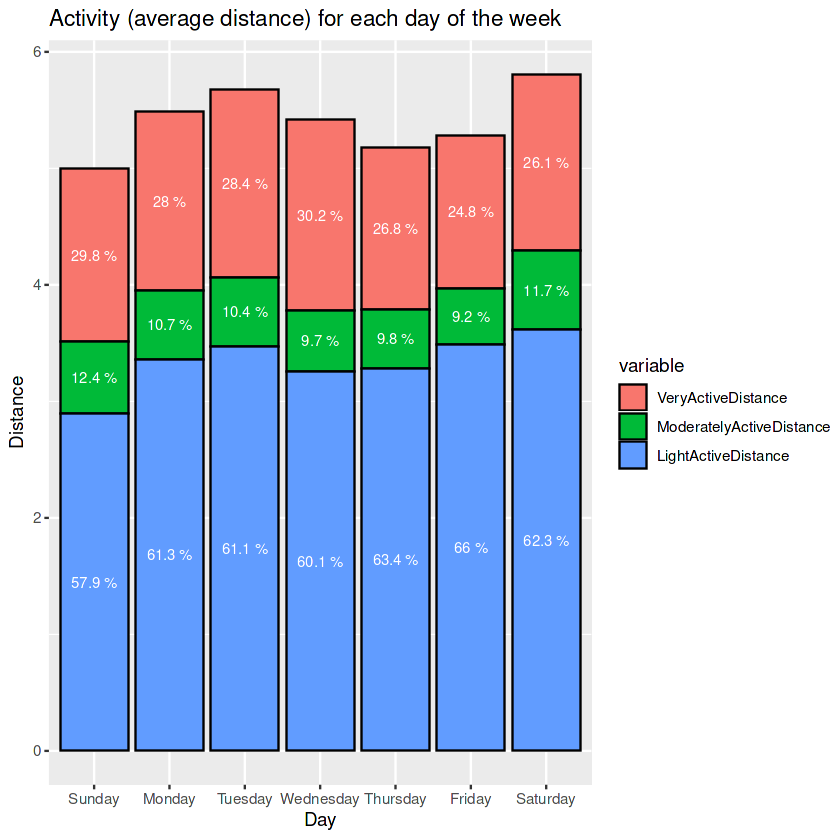

In [14]:
daily_activities$ActivityDate = as.POSIXct(daily_activities$ActivityDate, format='%m/%d/%Y') #change format
Sys.setlocale("LC_TIME", "C")
daily_activities$day = wday(daily_activities$ActivityDate, label=TRUE, abbr = FALSE) #add column with date

#obtain the mean distance per day; and calculate the percentage 
distance = daily_activities%>%
  group_by(day)%>%
  summarise(VeryActiveDistance = round(mean(VeryActiveDistance),3),
            ModeratelyActiveDistance = round(mean(ModeratelyActiveDistance),3),
            LightActiveDistance = round(mean(LightActiveDistance),3), 
            freq_active = round(mean(VeryActiveDistance)/mean(VeryActiveDistance+ModeratelyActiveDistance+LightActiveDistance),3)*100,
            freq_moderate = round(mean(ModeratelyActiveDistance)/mean(VeryActiveDistance+ModeratelyActiveDistance+LightActiveDistance),3)*100,
            freq_light = round(mean(LightActiveDistance)/mean(VeryActiveDistance+ModeratelyActiveDistance+LightActiveDistance),3)*100,
            )

#change to long format to be able to plot
distance_long= melt(distance[,1:4], id.vars = c('day')) 
distance_long1= melt(distance[,c('day', 'freq_active', 'freq_moderate', 'freq_light')], id.vars = c('day'))
distance_long$percent = distance_long1$value
distance_long = distance_long%>%rename(Distance = value,Day = day)

#plot
ggplot(distance_long, aes(x = Day, y = Distance, fill = variable)) +
  geom_col(colour = 'black') +
  geom_text(aes(x = Day, y = Distance, label = paste(percent, '%'), group = variable), 
            position = position_stack(vjust = .5), color = 'white', size = 3)+
  labs(title='Activity (average distance) for each day of the week')


**INFO 5**:
The average distance of users by day of the week is quite similar (ranging from 5 to 6). This is especially true in weekdays where the level of activity is almost the same. This makes senses, as for most users the structure of weekdays is very similar (typically structured by working hours from 9h to 17h). 

On the other hand the level of activity is very different on weekends: Saturday is the day where people do most activity, whereas Sunday is the one they do the less.  

The ratio of the type of activity (very active, moderately active, lightly active) is very similar from day to day. The interesting exception is Friday where people do less active activity. 




Lets zoom in to see what are the **hours of the day** in which users are more active. 

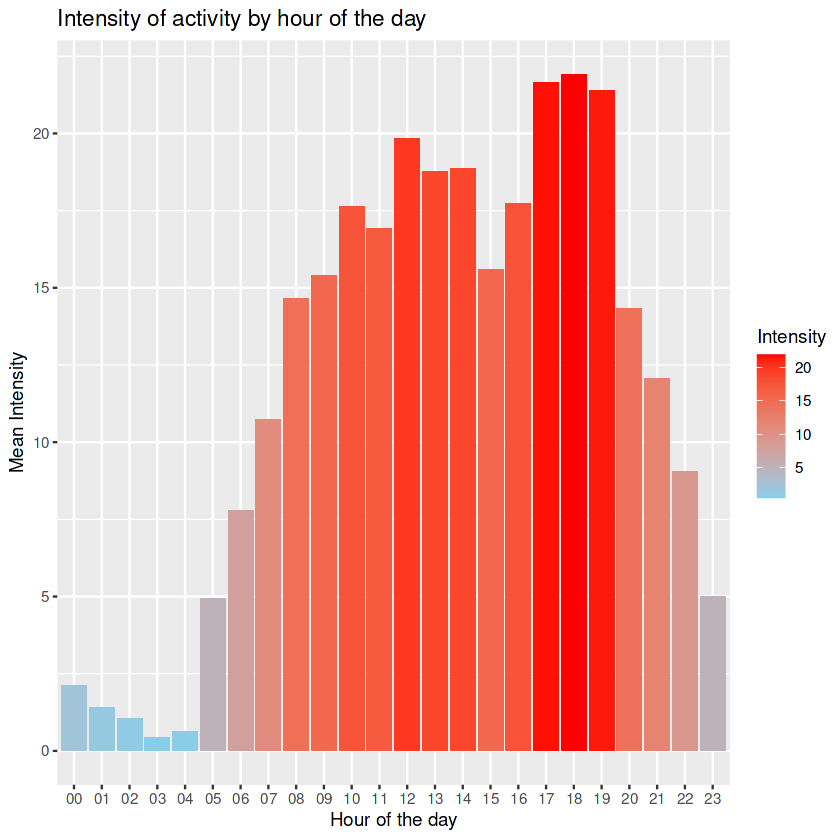

In [15]:
hourly_activities$ActivityHourDay=strptime(hourly_activities$ActivityHour, format = '%m/%d/%Y %I:%M:%S %p') #change format
hourly_activities$ActivityHour=format(hourly_activities$ActivityHourDay, format = '%H') #extract only hour 
hourly_activities$ActivityDay = as.POSIXct(hourly_activities$ActivityHourDay, format = '%m/%d/%Y')
hourly_activities$ActivityDay = wday(hourly_activities$ActivityDay,label=TRUE, abbr = FALSE)

mean_hour_intensity = hourly_activities%>%
  group_by(ActivityHour)%>%
  summarise(Intensity = mean(TotalIntensity))
  
ggplot(mean_hour_intensity,aes(ActivityHour, Intensity, fill = Intensity))+
  geom_bar(stat='identity')+
  scale_fill_gradient(low = "skyblue", high = "red")+
  labs(title = 'Intensity of activity by hour of the day')+
  ylab('Mean Intensity')+
  xlab('Hour of the day')

The above graph clearly shows two activity peaks: one from 12h to 14h, and most of all, one from 17h to 19h. 

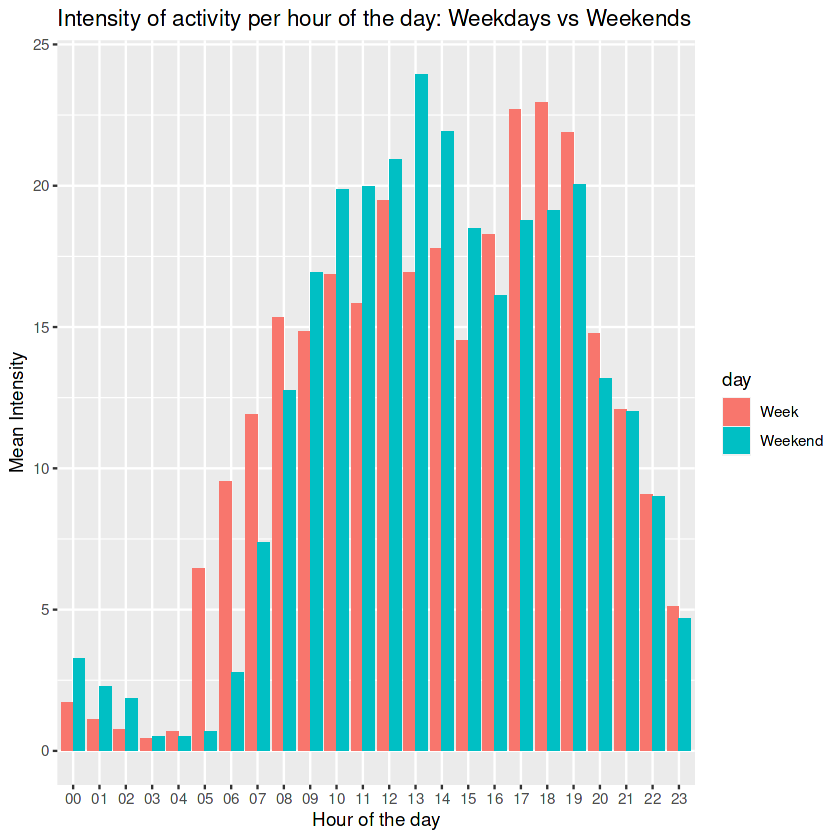

In [16]:
hourly_activities = hourly_activities%>%
  mutate(day = case_when(
    ActivityDay == 'Monday'~ 'Week',
    ActivityDay == 'Tuesday'~ 'Week',
    ActivityDay == 'Wednesday'~ 'Week',
    ActivityDay == 'Thursday'~ 'Week',
    ActivityDay == 'Friday'~ 'Week',
    ActivityDay == 'Saturday' ~ 'Weekend',
    ActivityDay == 'Sunday' ~ 'Weekend'))

ggplot(hourly_activities,aes(x = ActivityHour, y = TotalIntensity, fill = day))+
  geom_bar(stat='summary',  position='dodge', fun = 'mean')+
  labs(title = 'Intensity of activity per hour of the day: Weekdays vs Weekends')+
  ylab('Mean Intensity')+
  xlab('Hour of the day')


The hours of the day when users are most active is not the same on weekdays and weekends. Peak activity time is from 17h to 19h on weekdays (probably due to constraints linked to work), and from 12h to 14 on weekends. 




We can guess that hourly level of activity remains stable across days of the working week (Monday to Friday), due to work, but may considerably vary from Saturday to Sunday. Let's check this. 

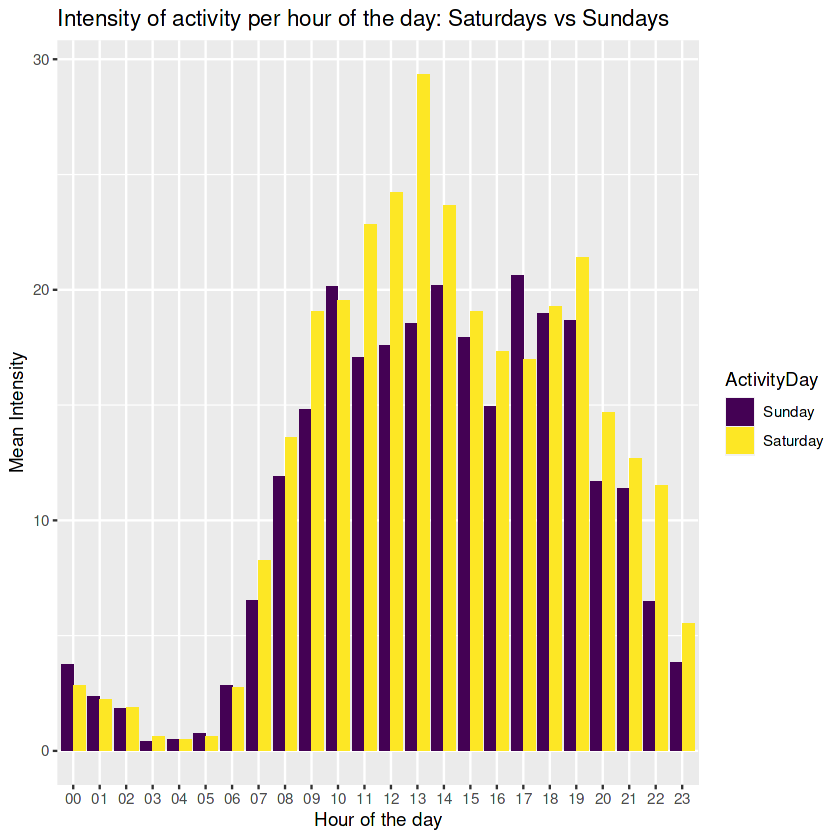

In [17]:
hourly_weekend = hourly_activities%>%
  filter(ActivityDay == 'Saturday' | ActivityDay ==  'Sunday')
  
ggplot(hourly_weekend,aes(x = ActivityHour, y = TotalIntensity, fill = ActivityDay))+
  geom_bar(stat='summary',  position='dodge', fun = 'mean')+
  labs(title = 'Intensity of activity per hour of the day: Saturdays vs Sundays')+
  ylab('Mean Intensity')+
  xlab('Hour of the day')

As we predicted, the patterns of physical activity by hour are different on Saturday's and Sunday's. 

**INFO 6:** The strong peak of activity we saw in the previous graph from 12h to 14h is mostly explained by the activity of Saturdays, where from 12h to 14h the level of activity is significantly high. 
In contrast activity on Saturdays seems to be much more distributed, with activity peaking at various different moments of the day (10h, 14h, 17h). 

##### SLEEP
Let's now take a look at the sleep monitoring data. First, let's see how much sleep do the users get. 

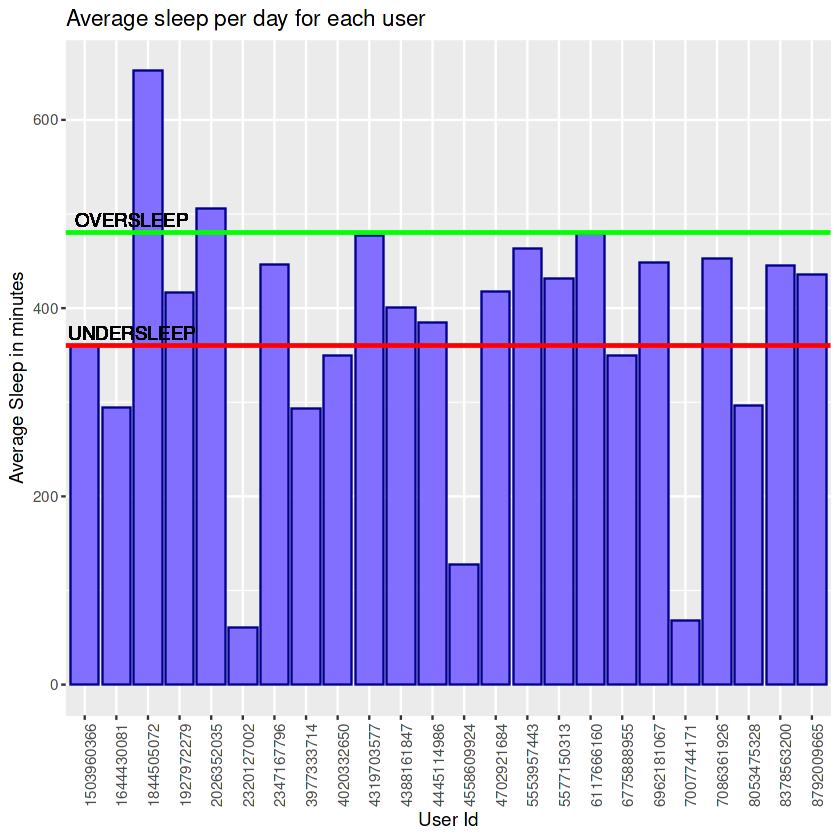

In [18]:
sleep_day$Id = as.factor(sleep_day$Id)
ggplot(sleep_day, aes(x = Id, y = TotalMinutesAsleep))+
  geom_bar(stat = 'summary', fun = 'mean', fill = 'slateblue1', color = 'blue4')+
  theme(axis.text.x = element_text(angle = 90))+
  geom_hline(yintercept = 480, colour = 'green', size = 1)+
  geom_text(aes(2.5, 480, label = 'OVERSLEEP',vjust = -0.4))+
  geom_hline(yintercept = 360, colour = 'red', size = 1)+
  geom_text(aes(2.5, 360, label = 'UNDERSLEEP',vjust = -0.4))+
  ylab('Average Sleep in minutes')+
  xlab('User Id')+
  labs(title = 'Average sleep per day for each user')

**INFO 7:** Sleep patterns among users are relatively varied here again. Most participants sleep duration ranges between the recommended 6 and 8 hours; around a 1/3 undersleep while 2 users oversleep.  

Let's see if we can find any relationship between activity and sleep quality. 

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



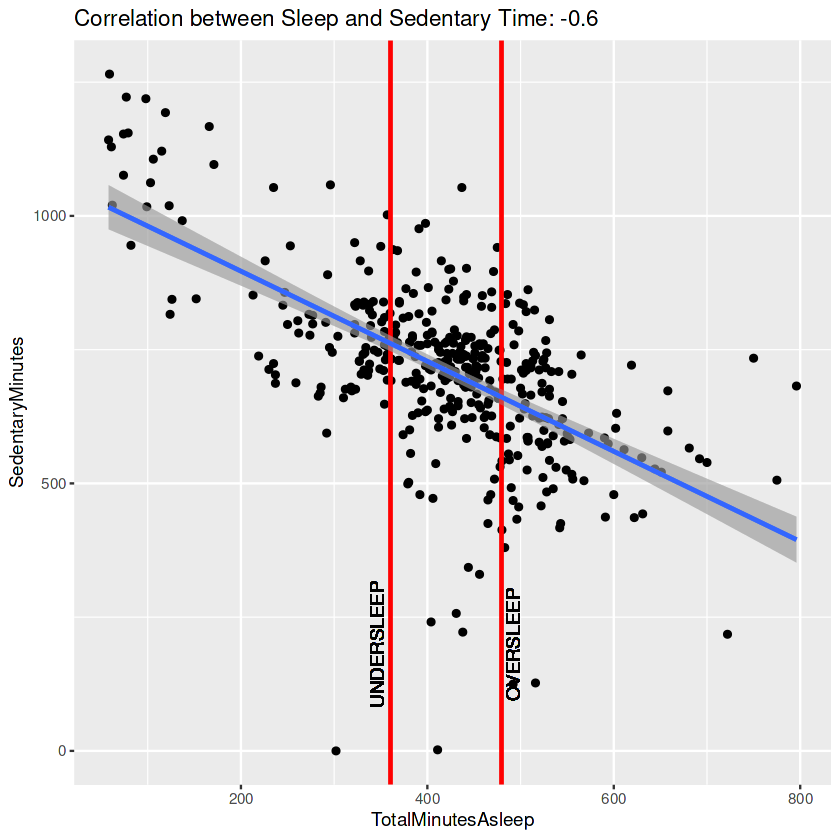

In [19]:
#change to correct format so that we can use daily activity data 
sleep_day$day = strptime(sleep_day$SleepDay, format = '%m/%d/%Y %I:%M:%S %p') 
sleep_day$day = format(as.Date(sleep_day$day))
sleep_day$ActivityDate = sleep_day$day 

sleep_activity = merge(daily_activities, sleep_day, by = c('Id', 'ActivityDate'))

correlation1 = round(cor(sleep_activity$TotalMinutesAsleep, sleep_activity$SedentaryMinutes),2)
ggplot(data = sleep_activity, aes (x = TotalMinutesAsleep, y = SedentaryMinutes))+
  geom_point()+
  geom_vline(xintercept = 360, colour = 'red', size = 1)+
  geom_text(aes(360, 200, label = 'UNDERSLEEP',vjust = -0.4, angle=90))+
  geom_smooth(method=lm)+
  geom_vline(xintercept = 480, colour = 'red', size = 1)+
  geom_text(aes(505, 200, label = 'OVERSLEEP',vjust = -0.4, angle=90))+
  geom_smooth(method=lm)+
  labs (title = paste("Correlation between Sleep and Sedentary Time:", correlation1))

**INFO 8**: We have a significant correlation that shows that the more time a user tends to be sedentary, the less sleep she gets. 

Let's see how sleep varies across the day of the week: 

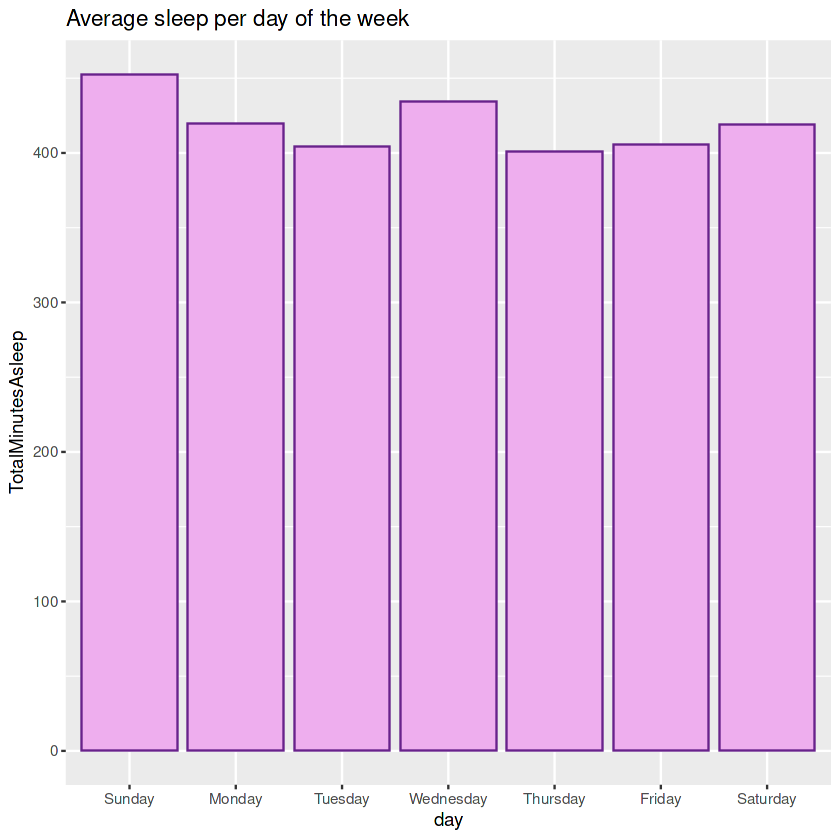

In [20]:
sleep_day$SleepDay = strptime(sleep_day$SleepDay, format = '%m/%d/%Y') #change format
sleep_day$SleepDay = as.POSIXct(sleep_day$SleepDay, format = '%m/%d/%Y') #extra
sleep_day$day = wday(sleep_day$SleepDay,label=TRUE, abbr = FALSE)

ggplot(sleep_day)+
  geom_bar(aes(x = day, y = TotalMinutesAsleep), 
           stat='summary',
           fun = 'mean', fill = 'plum2', color = 'darkorchid4')+
  labs(title = 'Average sleep per day of the week')

Users tend, on average, to sleep the same amount of time every day. As one could imagine, the day in which people sleep the longest is on Sundays. 

Lets now try to see the hourly sleep patterns.

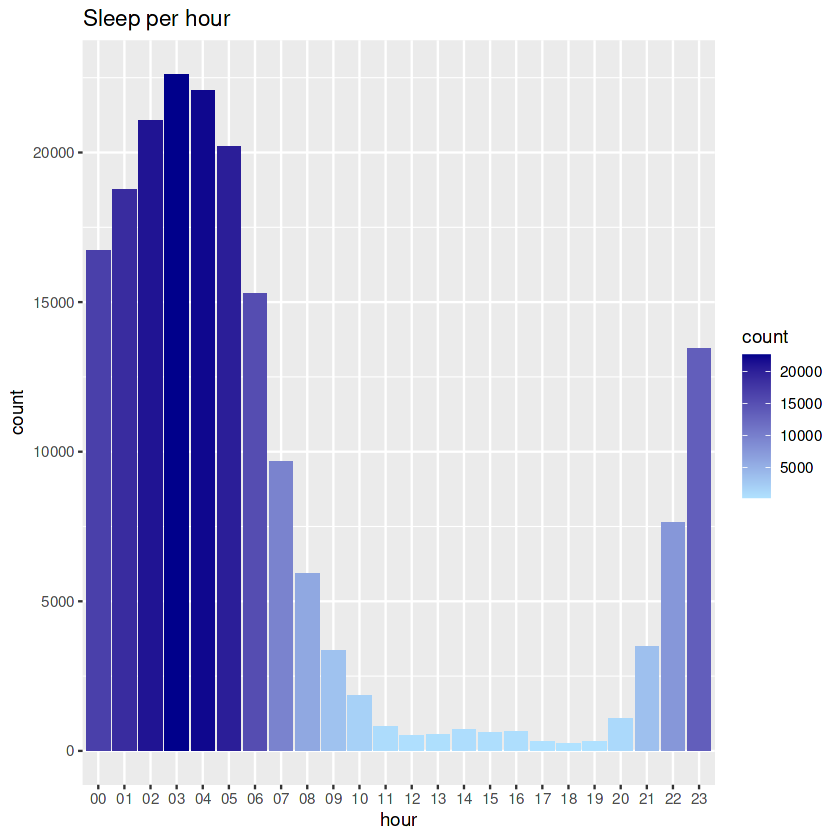

In [21]:
#change format
sleep_minutes$date=strptime(sleep_minutes$date, format = '%m/%d/%Y %I:%M:%S %p') #change format
sleep_minutes$hour=format(sleep_minutes$date, format = '%H') 

sleep_minutes$hour = as.factor(sleep_minutes$hour)

ggplot(sleep_minutes)+
  geom_bar(aes(x= hour, fill = after_stat(count)))+
   scale_fill_gradient(low = "lightskyblue1", high = "blue4")+
  labs(title = 'Sleep per hour')

**INFO 9:** As could be expected, the peak sleeping hours are 02h to 04h. Users generally go to sleep around 23h to 24h and wake up around 6h and 8h. 

One interesting information that can tell us something us about the quality of sleep is the percentage of time asleep (which measures the percentage of the minutes in bed in which one actually is asleep). 

In [22]:
sleep_day= sleep_day%>%
  mutate(perc_sleep = round((TotalMinutesAsleep/TotalTimeInBed)*100)) #percentage of time asleep in bed

sleep_day$ActivityDate = sleep_day$SleepDay
df = merge(daily_activities, sleep_day, by = c('Id', 'ActivityDate'))

##percentage per day
df%>%
  group_by(day.x)%>%
  summarize(mean_per = round(mean(perc_sleep),1))

day.x,mean_per
<ord>,<dbl>
Sunday,90.5
Monday,92.0
Tuesday,91.1
Wednesday,92.1
Thursday,92.2
Friday,92.0
Saturday,91.5


**INFO 10:** The percentage of time asleep is lowest on Sundays, meaning that probably users take advantage of Sunday mornings to stay a bit longer in bed even if they are not sleeping. 


##### WEIGHT
Let's finish our analysis by taking a look at the weight data - even if we only have data for 8 participants. 
The column which we will be looking at is one which tells us if the user has manually entered his weight or if it has been done automatically. 

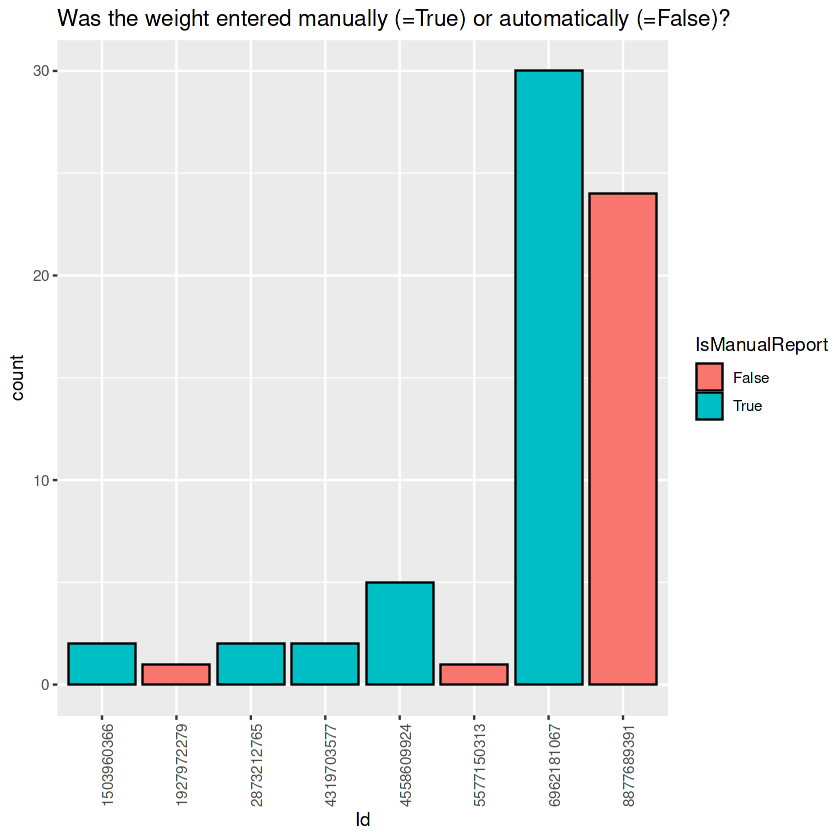

In [23]:
weight_log$Id = as.factor(weight_log$Id)

ggplot(weight_log)+
  geom_bar(aes(x = Id, fill = IsManualReport), color = 'black')+
  theme(axis.text.x = element_text(angle = 90))+
  labs(title='Was the weight entered manually (=True) or automatically (=False)?')

**INFO 11:** 5 out of 8 users entered their weight manually. It is a surprisingly large portion, as one would expect manually entering weight takes longer than doing it automatically. 
We can hypothesize that the way fitbit bracelets automatically register the weight of users is a bit complicated, making most of the users prefer to do it manually. 
Another interesting aspect is that only 2 users kept on measuring the weight data for more than 5 days. 


## 6. ACT 

##### WHAT STORY DOES OUR DATA TELL?
The analysis of the fitbit dataset has given us various key insights into how people use smart fitness devices: 

1. The time that users wear their (smart device) bracelet ranges between 15 and 24 hours. Only 36% of users wear the bracelet all day long (between 23 and 24 hours). 

2. There is a great variability in the fitness profile of users. There is a group of users which is very active (around 10, 000 steps per day or above); a group who is lightly active (between 5, 000 and 10, 000 steps), and another one which is inactive (under 5, 000 steps per day). In general, most of the users take less than the recommended 10,000 daily steps. 

3. The more steps one takes the more calories one burns. 

4. For the most part of the day, users are not moving. When they do move they tend to be lightly active. This gives us a hint at the type of jobs users have: most probably computer-based or office jobs, which require being sedentary (which explains why users are so sedentary). 

5. Activity levels remain similar across weekdays. Saturday is the day when users are the most active, while Sunday is the day where they are the least active. 

6. On weekdays physical activity generally takes place after work, between 17h and 19h. On weekends it's a different story: the data shows that on Saturday peak activity happens between 12h and 14h, while on Sundays the level of activity is fairly distributed across the whole day (with peaks at 10h, 14h, 17h)

7. Sleep patterns among users are relatively varied. Most participants sleep duration ranges between the recommended 6 and 8 hours; around a 1/3 undersleep while 2 users oversleep.  

8. The data suggests that the more time a user tends to be sedentary, the less sleep she gets. 

9. Users generally go to sleep around 23h-24h and wake up around 6h-8h, with sleep peaking from 2h to 4h. 

10. The percentage of time asleep is lowest on Sundays, meaning that probably users take advantage of Sunday mornings to stay a bit longer in bed even if they are not sleeping. 

11. Most users entered their data manually, and only 2 users continued measuring their weight for more than 5 days. 

##### HOW CAN THESE INSIGHTS HELP RESOLVE OUR BUISNESS TASK?

The above insights can help us build a better strategy, in various ways: 

1) **What kind of clients should the marketing  campaign focus on?** The fitness and health profile of smart device users is varied. The Bellabeat smart device data can appeal as much to women who are fit and healthy, as to those who aren't. The potential Bellabeat clients will very likely be women that work full-time jobs, and are therefore sedentary most of the time. A good way to attract them might be through digital marketing campaigns.  

2) **How important is it that the smart device bracelet is comfortable?** The bracelet design should be as comfortable as possible, to encourage people to keep the bracelet on all day long so that the smart device can monitor as many health parameters as possible.

3) **Suggestions based on our findings that could be used to improve the Bellabeat app and thus augment user engagement**:
 
  3.1) *Physical Activity*
  
  - Remind users of taking 10, 000 steps a day; and warn them when they take less than 5, 000 steps.
    
  - Send a notification when a user has been sedentary for too long.
    
  - Program notifications, based on the trends we discovered, which encourage users to do sport:
      + 16:30h on weekdays (to push users to do sport after work, typically betwen 17h and 19h, when they             have free time)
      + 11:30h on Saturdays. 
      + when waking up on Sundays. . 
    
  3.2) *Sleep*
  
  - Send a warning notification when people haven't slept between 6 and 8 hours.
    
  - Make personalised recommendations for people who don't get good sleep (for instance, decrease daily           sedentary time). 
    
  - Send a notification around 23h to go to bed. 
    
      
  3.3) *Weight* 
  
  - It would be important to introduce an easy way to automatically measure weight, and encourage users           to make use of this option, as it can drive user engagement and help them make healthier decisions. 
    
    
**Remark:** *One way of making user engagement go up could be by setting **weekly challenges**.* 




##### FUTURE DIRECTIONS

Despite the fact that our analysis reveals some interesting trends that can inform Bellabeat's strategy, we would need better quality data to be able to assert our conclusions with more confidence. It could therefore be profitable for Bellabeat to carry out a study where: 

- The data is exclusively about the target population: in our case, women. 

- There is more demographic data to better know the profile Bellabeat's smart devices appeal to. Age is a       factor which is especially important when analyzing health-related data. 

- The sample size is bigger. 

- This would result in more recent data, which is essential especially in the case of technology products (as   the technology industry evolves at a very fast pace, and as a consequence, data becomes quickly outdated).  

